In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


data_path = "https://drive.google.com/file/d/1uDb-UOOGITztZswUrg04H-UMu_Kvid5j/view?usp=sharing"


Mounted at /content/drive


In [ ]:

!pip install gdown
!gdown --id 1uDb-UOOGITztZswUrg04H-UMu_Kvid5j -O battery_dataset.zip # -O mean save as
!unzip battery_dataset.zip -d /content/battery_data # -d flag used to specify where the unziped folder should save
!ls /content/battery_data/5. Battery Data Set

In [ ]:
# extract inner ziped folder

import zipfile
import os

folder_path = '/content/battery_data'  # path where outer zip was extracted

for file in os.listdir(folder_path):
    if file.endswith('.zip'):
        inner_zip_path = os.path.join(folder_path, file)
        with zipfile.ZipFile(inner_zip_path, 'r') as zip_ref:
            zip_ref.extractall(os.path.join(folder_path, file[:-4]))  # create folder with same name


In [ ]:
!cp -r /content/battery_data /content/drive/MyDrive/DeepLearningProject/

In [18]:
from scipy.io import loadmat
import os

sample_file = '/content/drive/MyDrive/DeepLearningProject/unzipped_data/B0005.mat'

mat_data = loadmat(sample_file)
print(mat_data.keys())


dict_keys(['__header__', '__version__', '__globals__', 'B0005'])


In [20]:
b0005_data = mat_data['B0005']
print(type(b0005_data))
print(b0005_data.shape)
print(b0005_data.dtype)
print(b0005_data[0,0].dtype)

<class 'numpy.ndarray'>
(1, 1)
[('cycle', 'O')]
[('cycle', 'O')]


In [21]:
cycles = b0005_data[0,0]['cycle'][0]
print("Number of cycles:", len(cycles))
print(cycles[0].dtype)


Number of cycles: 616
[('type', 'O'), ('ambient_temperature', 'O'), ('time', 'O'), ('data', 'O')]


In [22]:
import pandas as pd

# Extract data from cycles
cycles = b0005_data[0,0]['cycle'][0]

cycle_list = []

for i, cycle in enumerate(cycles):
    cycle_type = cycle['type'][0]
    if cycle_type == 'discharge':
        data = cycle['data'][0,0]
        capacity = float(data['Capacity'][0,0])
        voltage_measured = data['Voltage_measured'][0]
        current_load = data['Current_load'][0]
        temperature_measured = data['Temperature_measured'][0]
        time = data['Time'][0]

        cycle_list.append({
            'cycle_number': i+1,
            'capacity': capacity,
            'voltage_measured': voltage_measured.mean(),
            'current_load': current_load.mean(),
            'temperature_measured': temperature_measured.mean(),
            'time': time[-1] if len(time) > 0 else 0
        })

# Create DataFrame
df_b0005 = pd.DataFrame(cycle_list)

# Preview
print(df_b0005.head())
print(df_b0005.shape)


   cycle_number  capacity  voltage_measured  current_load  \
0             2  1.856487          3.529829     -1.805570   
1             4  1.846327          3.537320     -1.804583   
2             6  1.835349          3.543737     -1.803575   
3             8  1.835263          3.543666     -1.812863   
4            10  1.834646          3.542343     -1.812876   

   temperature_measured      time  
0             32.572328  3690.234  
1             32.725235  3672.344  
2             32.642862  3651.641  
3             32.514876  3631.563  
4             32.382349  3629.172  
(168, 6)


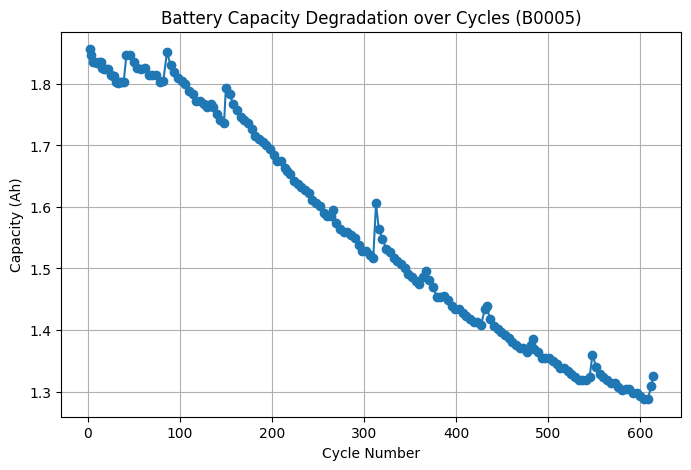

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(df_b0005['cycle_number'], df_b0005['capacity'], marker='o')
plt.title('Battery Capacity Degradation over Cycles (B0005)')
plt.xlabel('Cycle Number')
plt.ylabel('Capacity (Ah)')
plt.grid(True)
plt.show()
